# Turing Machine and Deep Learning

## Assignment 1: Preliminaries

This notebook is meant for you to review some mathematics to help your intuition when dealing with more complex models, and some hands on practice with `numpy` and `matplotlib` to review some programming skills. It also introduces you to some common ML lingo. This notebook must be in your GitHub directory by the deadline mentioned on Canvas.

### Handing in your Assignment

Git is an invaluable resource to researchers and developers, and thus for this course, all course material will be (additionally) shared on GitHub. Though there is a tiny bit of a learning curve, this is worth the effort. To hand in your assignment (applicable to all weeks):

1. Create a GitHub repository (this will be where you submit *all* homework assignments). Share the public link to this repository with us via
2. Create a folder called "Week 1" and copy this notebook and any other files or data that may be needed.
3. Finish the notebook and commit and push regularly. Your final commit before the deadline will be graded.


### Grading

Grading is based on effort and you can either obtain a pass or fail for the assignment.

## Question 1.1 -- Regression as minimization

Derive the closed form solution for ***a*** in a 1-dimensional linear regression as states as an optimization (minimization) problem. You may upload a handwritten scan/photograph, a screenshot of a text editor, or LaTeX notation directly.

- *Given*: $n$ input-output pairs of the form $$(x_i, y_i)$$
- *To find*: The coefficients of the line of best fit $$\hat{y_i} = a+bx_i$$
- *Loss function*: The sum of squared errors: $$f(Y, \hat{Y})=\sum_{i=0}^{n}(y_i-\hat{y}_i)^2$$
- ***b*** is found by taking partial derivates with respect to ***b*** and setting it to zero. This gives $$ b = \frac{\sum_{i=0}^{n}(x_i - \bar{x})(y_i-\bar{y})}{\sum_{i=0}^{n}(x_i - \bar{x})^2} $$
Note that in general, loss functions are the distance function *averaged over all data points in the set*. For now, you can ignore this point.

*Hint: Treat this as a regular minimization problem. Find where the partial derivates are zero of the error are with respect to the variables you wish to find.*

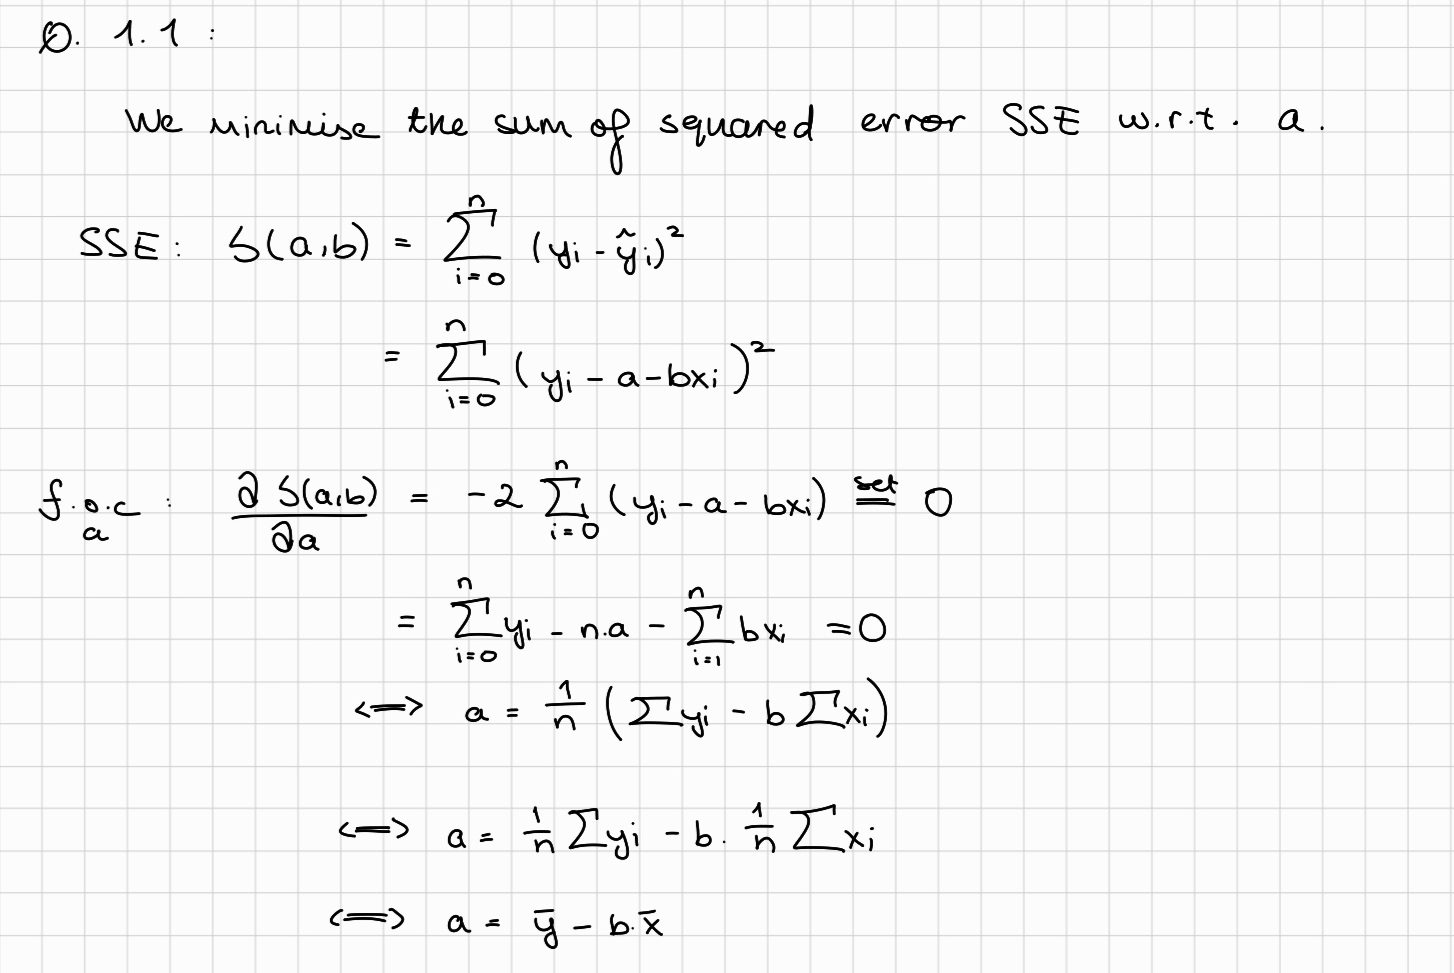

## Question 1.2 -- Function analysis

Is there only one unique solution for $a$ and $b$? Why/why not?

*Hint: Think of the shape of the loss function, a.k.a. the 'loss landscape'.*

The values of a and b that minimizes the sum of squared error is unique for the given data, because the SSE has a unique minimum defined at points a and b.

Would the solutions for $a$ and $b$ be different if you used mean squared error instead of sum of squared errors? Why?

We would find a different but still unique solution. Minimizing a different error measure means we are using a different criterion to determine the coefficients. Coefficients determined by a different criterion are bound to be different as a different function may have a minimum at a different location than SSE.

## Question 2.1 -- Function generation

Write a function that takes as input a list of floats $x_i$ to and outputs a list of the form:
$$y_i=sin(x_i)+\eta_i$$
where $\eta_i$ is normally sampled noise with a small standard deviation $\epsilon$:
$$\eta_i \sim \mathcal{N}(0, \epsilon)$$

Now, to see your work, plot it!
- Sample 20 equally-spaced points from the range $x\in [0,\pi/4]$ (cf. numpy's `linspace` function).
- Set $\epsilon=0.1$
- Sample y-values from your function using the noisy formula above.
- Plot this as a scatter plot.
- For reference, plot the function $y_i=sin(x_i)$ (no noise).
- Don't forget to add labels, a legend and other information.
- Optional Tip: Set a random seed (np.random.seed) to ensure reproducability of your results.

---


Your results should look something like this:
![image.png](attachment:image.png)

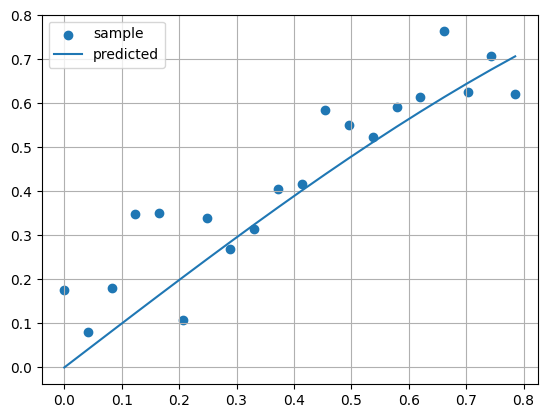

In [4]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

def generate_sin(x, epsilon):
    output = []

    for i in x:
        eta_i = np.random.normal(0, epsilon)
        yi = np.sin(i) + eta_i
        output.append(yi)

    return output

n_samples = np.linspace(0, np.pi/4, 20)

# TODO: create noisy function
x = n_samples
y = generate_sin(x, 0.1)

# TODO: create true function
x_pure = n_samples
y_pure = generate_sin(x,0)

# TODO: plot data, line
plt.scatter(x,y, label='sample')
plt.plot(x_pure, y_pure, label='predicted')
plt.grid()
plt.legend()
plt.show()

## Question 2.2 -- Implementation of Linear Regression

Write a function that takes as input a list of $(x,y)$ pairs and returns the coefficients and residuals for a linear regression. Specifically, use the formula for $a$ and $b$ you found in Question 1.1.

*Hint: It may be better to create a new function that computes the sum of squared errors separately, taking $a$, $b$, and the $(x,y)$ pairs as inputs, and outputting a single float value.*

Compute and plot the line of best fit, along with the data and true function as you did above. Also print out the coefficients and the residuals (sum of square errors). How does this line compare to the true function?

---

You should get something similar to this:

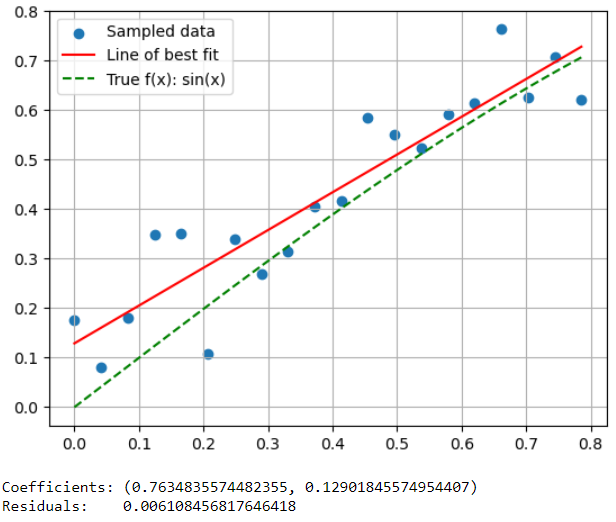

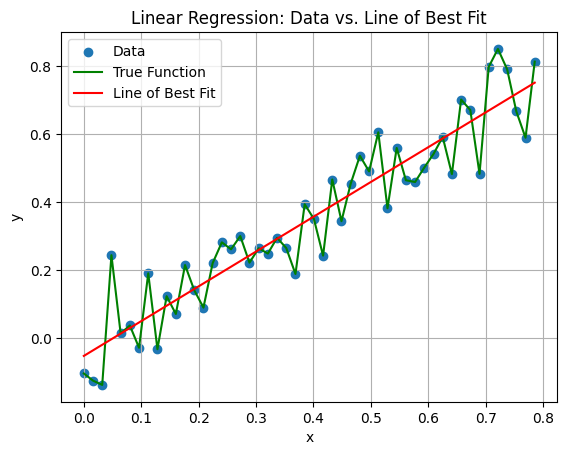

Coefficients: (-0.05323419263394619, 1.0235206463093087)
Residuals:    0.39179394441786075


In [18]:
import numpy as np

def compute_sos(y_true, y_pred):

    residuals = np.array(y_true) - np.array(y_pred)
    sos = np.sum(residuals ** 2)
    return sos

def lin_reg(xs, ys):

    # Compute the means to use in the computation of a and b
    mean_x = np.mean(xs)
    mean_y = np.mean(ys)

    # Compute b
    numerator = np.sum((np.array(xs) - mean_x) * (np.array(ys) - mean_y))
    denominator = np.sum((np.array(xs) - mean_x) ** 2)
    b = numerator / denominator

    # Compute a
    a = mean_y - b * mean_x

    # Compute the predicted y values
    y_pred = b * np.array(xs) + a

    # Compute SSR
    res = compute_sos(ys, y_pred)
    return a, b, res

# Generate line of best fit
a, b, res = lin_reg(x, y)
y_best = b * np.array(x) + a

plt.scatter(x, y, label="Data")
plt.plot(x, y, label="True Function", color='green')
plt.plot(x, y_best, label="Line of Best Fit", color='red')

plt.grid()
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression: Data vs. Line of Best Fit')
plt.show()

print("Coefficients:", (a, b))
print("Residuals:   ", res)


## Question 2.3 -- Comparison to existing model

Use numpy's `polyfit` functions to get the coefficients and residuals of the same data points. Plot a line using these coefficients, and plot the sampled data, your previous line of best fit, and the true function, as before, for reference. How does this compare to the function you derived for $a$ and $b$? Print out the values for $a$, $b$ and the residuals to compare them. What does this tell you about the way `polyfit` is implemented?

*Tip: Use a dashed/dotted line for the new function to make the comparison easier.*

*General tip: Don't overwrite your previous variables!*

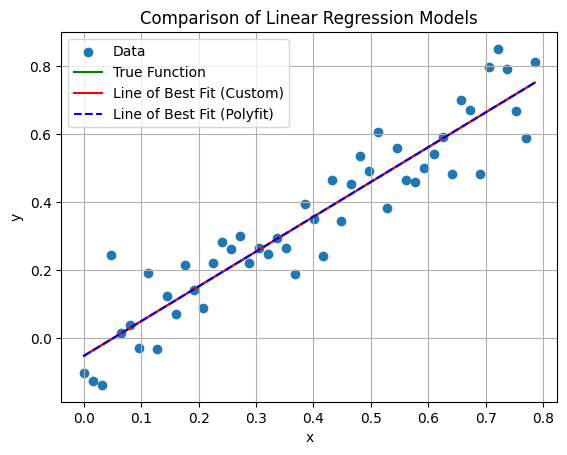

Coefficients:      (-0.05323419263394619, 1.0235206463093087)
Residuals:         0.39179394441786075
Coefficients (np): (-0.05323419263394619, 1.0235206463093092)
Residuals (np):    0.3917939444178608


In [15]:
# Use np polyfit here
b_np, a_np = np.polyfit(x, y, 1)
y_best_np = b_np * np.array(x) + a_np

plt.scatter(x, y, label="Data")
plt.plot(x, y_best, label="True Function", color='green')
plt.plot(x, y_best, label="Line of Best Fit (Custom)", color='red')
plt.plot(x, y_best_np, label="Line of Best Fit (Polyfit)", color='blue', linestyle='--')

plt.grid()
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparison of Linear Regression Models')
plt.show()

# Print results
res_np = compute_sos(y, y_best_np)
print("Coefficients:     ", (a, b))
print("Residuals:        ", res)
print("Coefficients (np):", (a_np, b_np))
print("Residuals (np):   ", res_np)


The coefficients and residuals computed by np.polyfit are almost equal to the coefficients we calculated in the previous question. This tells us that the polyfit function is implemented correctly, because we get consistent coefficients.

## Question 3 -- Test vs train loss

The mean of the residuals you computed above are often called the *training loss* or *training error* in machine learning lingo. In general, this phrase translates to the loss (difference between observed and predicted $y$ values in whatever metric you wish) over all data points available for you to train on (your *train/train set*). In our case, the 'metric' is the function you minimized, i.e. sum of squared errors.

In real life, you generally do not generate these data points -- you observe them from your experiments. However, you would want for your model to perform well on points that were *not* used to train your model as well -- this is called *generalization*. Thus, to test this, we use a *test set* -- a series of new observations. This will become important in following weeks when we use more complex models.

In general, we would want our test and train sets to have the same distributional properties, including the underlying function and the distribution of noise. Thus, for now, we *generate* a test set and see how our models 'perform' on it (again, we generally do not have access to the underlying function to generate datapoints with, we observe them through experiments). We compute the *test loss* or *test error* using the same metric as the training error (i.e. sum of square errors in this case).

Thus, for this exercise:
- Generate a new set of x-values in the range of $x\in[0,\pi/4]$. Compute a series of y-values using your `generate_sin` function, using the same $\epsilon$ and $n$ as before.
- Rewrite the function that computes the residuals to now compute the *mean* of the residuals. Thus, our loss function is the Mean Squared Error:
$$MSE = \frac{1}{N} \sum_{i=0}^{n}(y_i-\hat{y_i})^2$$
- Make a scatter plot of the train set and test set, and plot the two lines of best fit and the true function computed earlier on the train set. Don't forget labels. Does this seem to be of a similar distribution of the train set?
- Compute and print out the training and test losses.

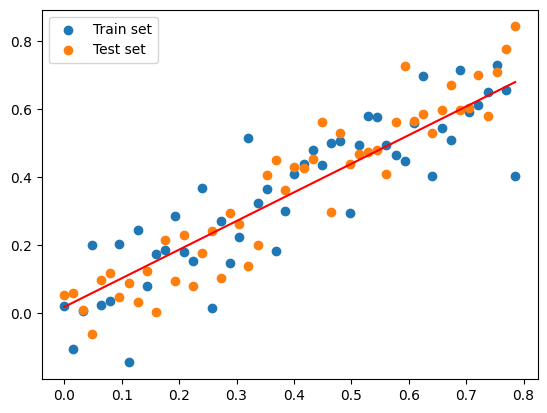

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def generate_sin(n, epsilon):
    x = np.linspace(0, np.pi / 4, n)
    y = np.sin(x) + np.random.normal(0, epsilon, n)
    return x, y

def compute_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Generate train set
n = 50
epsilon = 0.1
x, y = generate_sin(n, epsilon)

# Compute the coefficients a and b
b, a = np.polyfit(x, y, 1)

# Generate test set
x_test, y_test = generate_sin(n, epsilon)

# Plot train and test sets
plt.scatter(x, y, label= 'Train set')
plt.scatter(x_test, y_test, label='Test set')
plt.legend()

# Plot lines of best fit and true function on train set
plt.plot(x, a + b*x, color='red', label='best fit train')


Which of the two losses *should* be better? Which is actually better? Why?

The error is smaller for the test set than the train set.

## Question 4 -- Ablation study of sampling

Try out different values of $n$ and $\epsilon$. How does each one affect the performance of your linear models? (report your steps and general observations both for the train and test sets).

As n increases, we generally expect the model to have better performance. With more data points, the model has more information to learn from, leading to potentially better fitting. We might observe decreasing residuals on both the training and test sets as n increases.

Larger values of ϵ introduce more noise into the data, possibly decreasing model accuracy. We might observe higher residuals on both the training and test sets as ϵ increases. The variability in the residuals might also increase.

## Question 5.1 -- More data

Generate a training and test set using the `generate_sin` function you defined, but in the range $x\in[0,2\pi]$, $n=20$ and $\epsilon=0.2$. Plot the train and test sets (scatter plots) and true function in one plot.

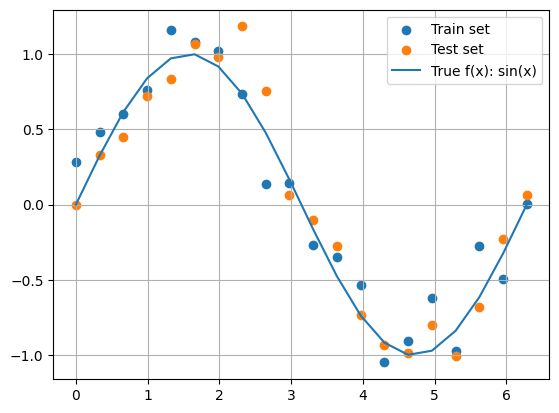

In [32]:
def generate_sin(n, epsilon):
    x = np.linspace(0, 2*np.pi, n)
    y = np.sin(x) + np.random.normal(0, epsilon, n)
    return x, y

# TODO: generate new data and plot
n_samples = 20

#unpack the tuples returned by generate_sin
x_train, y_train = generate_sin(n_samples, 0.2) 
x_test, y_test = generate_sin(n_samples, 0.2)    

x_pure = np.linspace(0, np.pi*2, 20)
y_pure = np.sin(x_pure)

plt.scatter(x_train, y_train, label="Train set")
plt.scatter(x_test, y_test, label="Test set")

plt.plot(x_pure, y_pure, label="True f(x): sin(x)")
plt.grid()
plt.legend()
plt.show()


## Question 5.2 -- Polynomial fitting

Now, we examine the flexibility of the model we use and the performance on the training and test sets. 'Flexibility' is generally ill-defined, but intuitively, *a learning algorithm $A$ is more flexible than another learning algorithm $B$ if $A$ can fit its computed models $\hat{f}$ more closely to the training data than $B$ can do.* (quote from Jaeger, 2022, pg 11). For example, a quadratic function is more flexible (in theory) than a linear one, since a quadratic function can model data *at least* as well as linear ones. Specifically, the set of all linear functions is a subset of quadratic ones (by setting the quadratic coefficient to zero).

- Using the datapoints you made above with $x\in[0,2\pi]$, compute the best fitting polynomials from degrees $d\in\{1,...,20\}$.
- Save the corresponding train and test losses, and the resulting coefficients. Don't forget to change the function that computes the mean squared errors if required (perhaps `np.polyval` may help here?). Also, don't forget to create your model based _only_ on your train set.

In [35]:
def compute_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Generate the data points and unpack tuples
n_samples = 20
x_train, y_train = generate_sin(n_samples, 0.2)
x_test, y_test = generate_sin(n_samples, 0.2)

# Initialize lists to store results
train_losses = []
test_losses = []
coefficients = []

# Compute the best fitting polynomials for degs ranging from 1 to 20
for deg in range(1, 21):
    # Fit the polynomial to the training data
    coeffs = np.polyfit(x_train, y_train, deg)
    y_train_pred = np.polyval(coeffs, x_train)
    y_test_pred = np.polyval(coeffs, x_test)
    
    # Compute the mean squared errors
    train_loss = compute_mse(y_train, y_train_pred)
    test_loss = compute_mse(y_test, y_test_pred)
    
    # Save the results
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    coefficients.append(coeffs)

# Find the best deg based on test loss
best_deg = np.argmin(test_losses) + 1
best_test_loss = test_losses[best_deg - 1]
best_coeffs = coefficients[best_deg - 1]

print("Best deg:", best_deg)
print("Corresponding test loss:", best_test_loss)
print("Coefficients of best fitting polynomial:", best_coeffs)


Best deg: 5
Corresponding test loss: 0.044917960299935174
Coefficients of best fitting polynomial: [-0.00465237  0.07051825 -0.27181261 -0.16021609  1.50598507 -0.11159797]


C:\Users\USER\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3433: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\USER\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3433: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\USER\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3433: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


**Bonus**: You may encounter this warning (if you don't, try increasing the range of polynomial degrees):

`RankWarning: Polyfit may be poorly conditioned`

What does this mean?

The meaning of this warning is that the polynomial fitting process may not be reliable, and the  coefficients may not accurately represent the underlying relationship between the input and output variables.

## Question 5.3 -- Analysis
Plot the lines of best fit for $d=\{1,2,3,5,10,20\}$. These should look like the plots shown in Lecture 1 under section *Polynomial Regression*. You may also show this in multiple plots as long as you have the reference plots for each (the train and test data and the true underlying function).

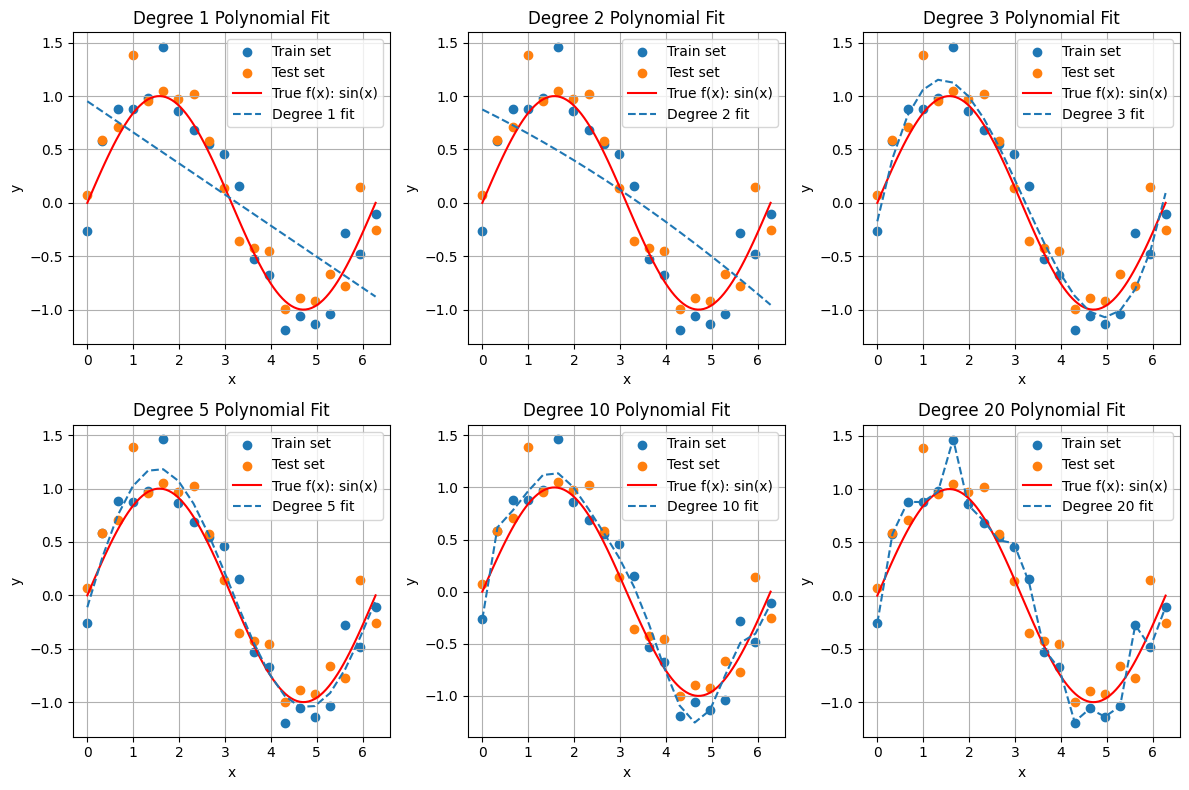

In [46]:
def true_function(x):
    return np.sin(x)

# Plot the lines of best fit for different degrees
degrees = [1, 2, 3, 5, 10, 20]
plt.figure(figsize=(12, 8))



for (index, deg) in enumerate(degrees, 1):  #Each tuple contains an index starting from 1 and the corresponding value from the degrees list.
    
    # Get the coefficients for the current degree
    coeffs = coefficients[deg - 1]
    
    # Compute the predicted values for the training and test sets
    y_train_pred = np.polyval(coeffs, x_train)
    y_test_pred = np.polyval(coeffs, x_test)
    
    plt.subplot(2, 3, index) #2 rows 3 cols of little plots

    plt.scatter(x_train, y_train, label="Train set")
    plt.scatter(x_test, y_test, label="Test set")
    
    # Plot the true function
    x_pure = np.linspace(0, 2*np.pi, 100)
    y_pure = true_function(x_pure)
    plt.plot(x_pure, y_pure, label="True f(x): sin(x)", color='red')
    
    # Plot the line of best fit
    plt.plot(x_train, y_train_pred, label=f"Degree {deg} fit", linestyle='--')
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f"Degree {deg} Polynomial Fit")
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()


Now plot the MSE losses versus the flexibility (degree of the best fitting functions) for both the test and train sets. Again, a similar plot can be found in Lecture 1 under *Overfitting and Underfitting*.

In [42]:
enumerate(degrees,1)


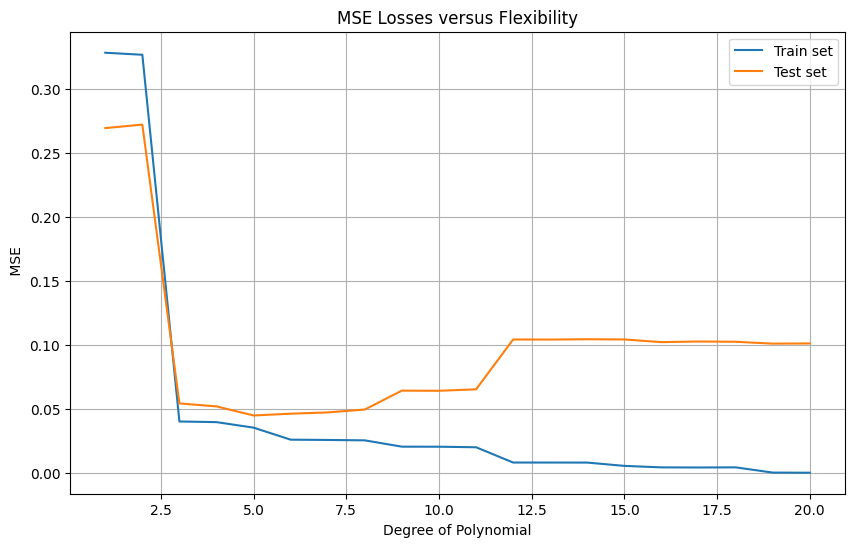

In [44]:
import matplotlib.pyplot as plt

# Plot MSE losses versus flexibility
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), train_losses, label='Train set')
plt.plot(range(1, 21), test_losses, label='Test set')
plt.xlabel('Degree of Polynomial')
plt.ylabel(' MSE')
plt.title('MSE Losses versus Flexibility')
plt.legend()
plt.grid()
plt.show()


## Open Questions (Question 6)
1. Where do the polynomial models start to overfit? How can you tell?
2. What model fits the best to the training data? What model fits the best to the underlying function (visually, according to your intuition about the plots)? Are they the same?
4. Try increasing the number of training points to $n=200$. At what point does overfitting start now?
5. In general, does increasing the number of training points always allow for more flexible models of the real world? Why/why not?

1. Polynomial models typically start to overfit when their complexity (degree) increases beyond a certain point Overfitting occurs when the model captures noise in the training data rather than the underlying pattern. We can tell a model is overfitting by observing the discrepancy between the train and test MSE losses. As the degree increases, the train loss tends to decrease, while the test loss may initially decrease but eventually start to increase, indicating worse performance on unseen data.

2. The model that fits the best to the training data is likely to be the one with the lowest train MSE loss. However, the model that fits the best to the underlying function may not necessarily be the same. The model that closely follows the true function across a wide range of input values is likely to be the best fit to the underlying function. In some cases, the model that fits the best to the training data may not generalize well to the underlying function, especially if it suffers from overfitting.

3. With more training points, the model has more data to learn from, which can help it capture the underlying pattern better. However, overfitting can still occur if the model complexity (degree of the polynomial) is too high relative to the amount of available data. 

4. Increasing the number of training points does not always allow for more flexible models. More training data can provide the model with more information to learn from and capture more complex relationships but it does have limitations.